## Importation des librairies

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Importation du jeu de données

In [7]:
chain = pd.read_excel(r"..\dataset\trainData.xlsx")
print("Jeu de données importé ✅✅")

Jeu de données importé ✅✅


## Affichage des valeurs manquantes 

<Axes: >

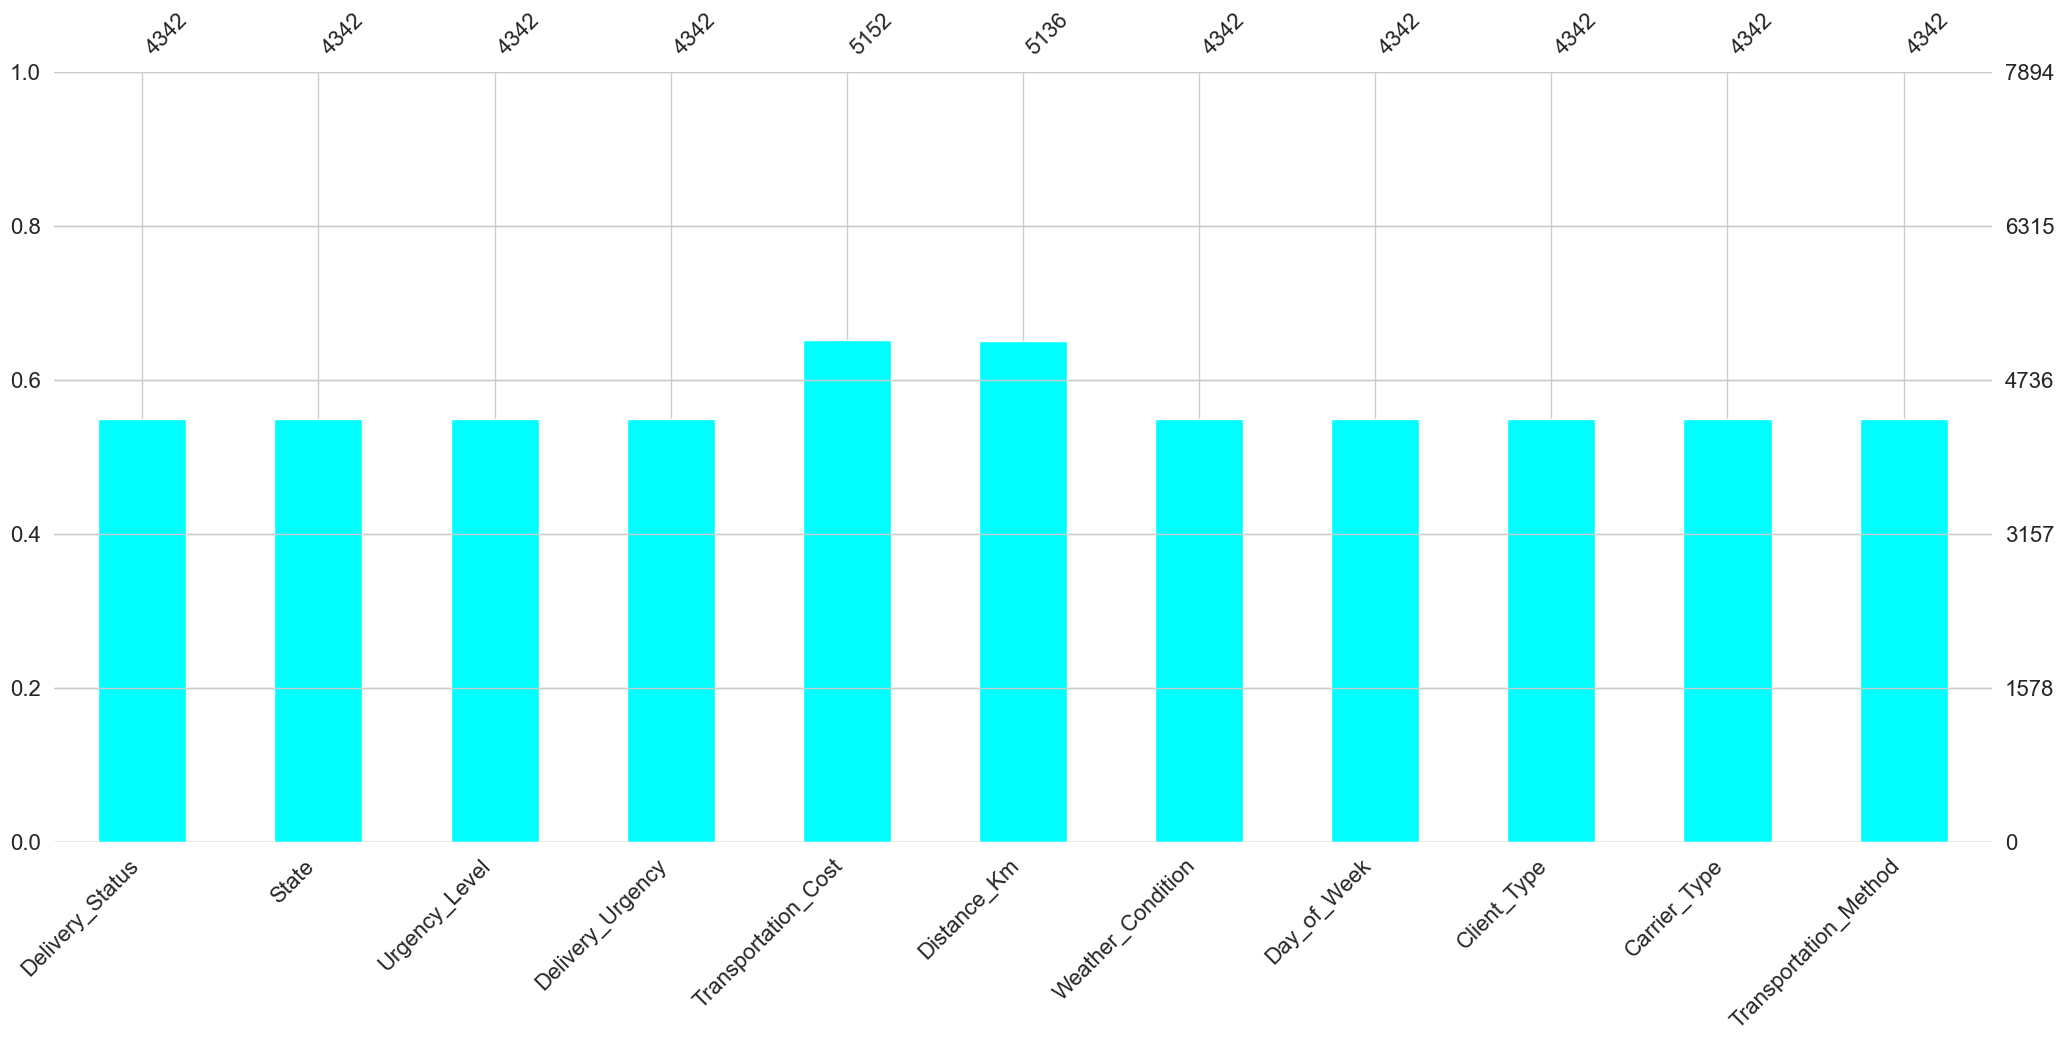

In [8]:
msno.bar(chain, color="cyan")

## Affichage des doublons

In [9]:
# Vérification des doublons
doublons = chain.duplicated().sum()
if doublons == 0: 
    print("Pas de doublons")
else : 
    print(f"Doublons détectés : {doublons} lignes en double")

Doublons détectés : 14 lignes en double


## Set Up

In [10]:
sns.set(style="whitegrid")

# Sélection des types de données
num_col = chain.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_col = chain.select_dtypes(include=["object"]).columns.difference(["Delivery_Status"]).tolist()

# Cible = Target 
target = chain["Delivery_Status"]

## Analyse univariée

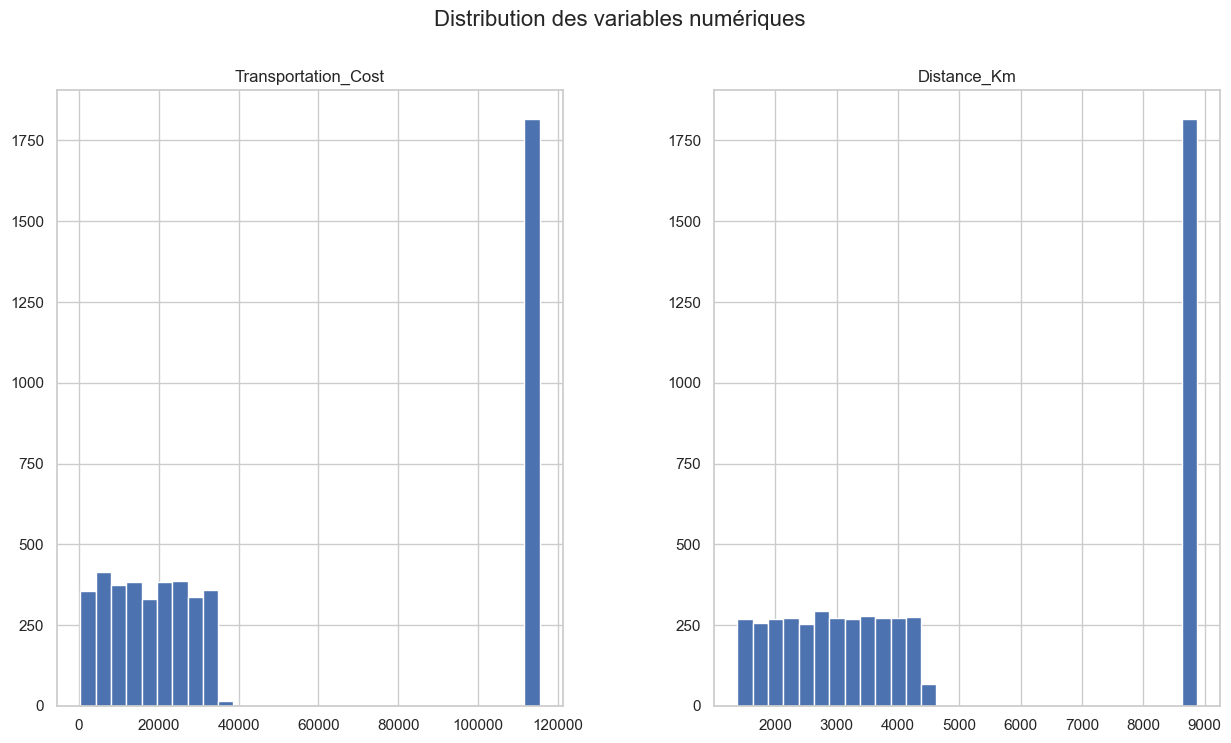

In [11]:
chain[num_col].describe()
chain[num_col].hist(bins=30, figsize=(15,8))
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()

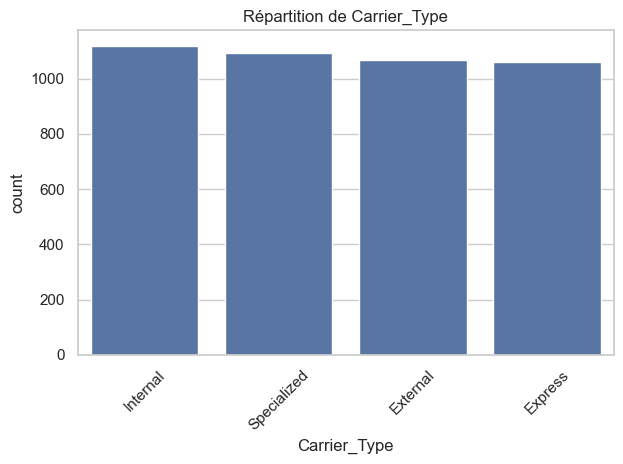

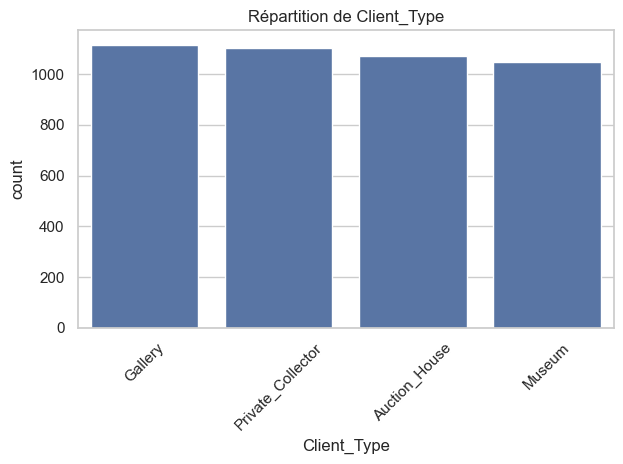

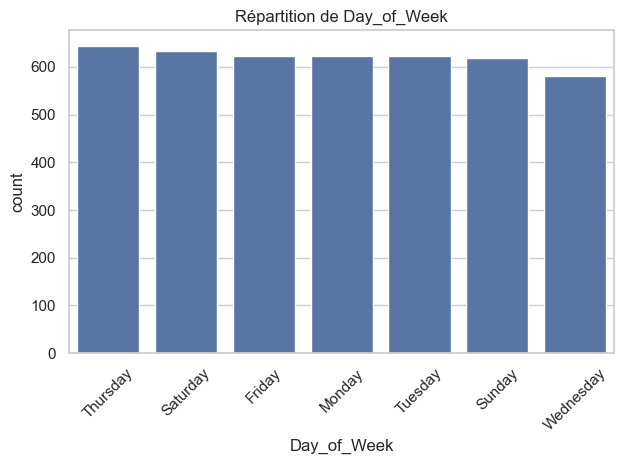

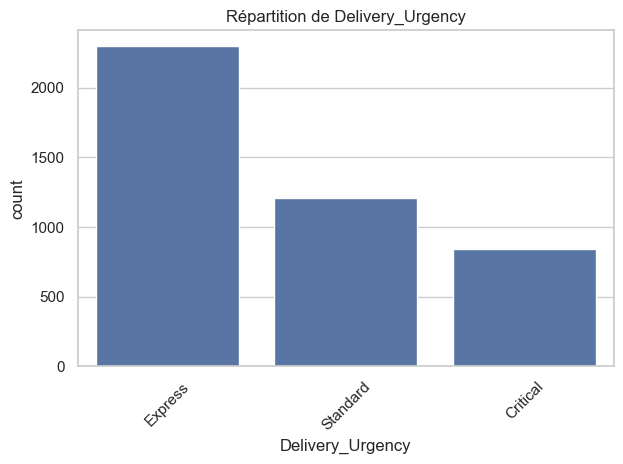

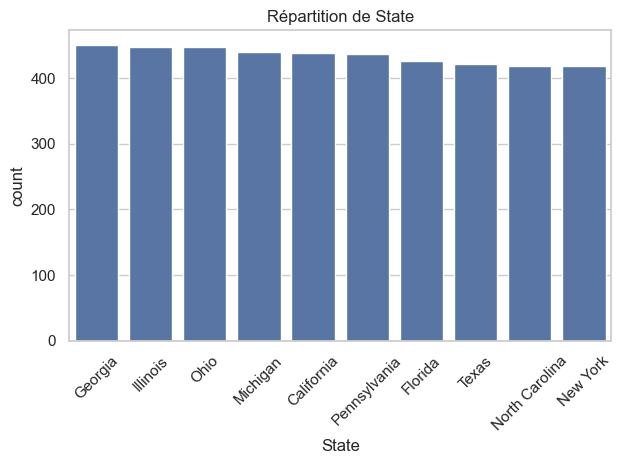

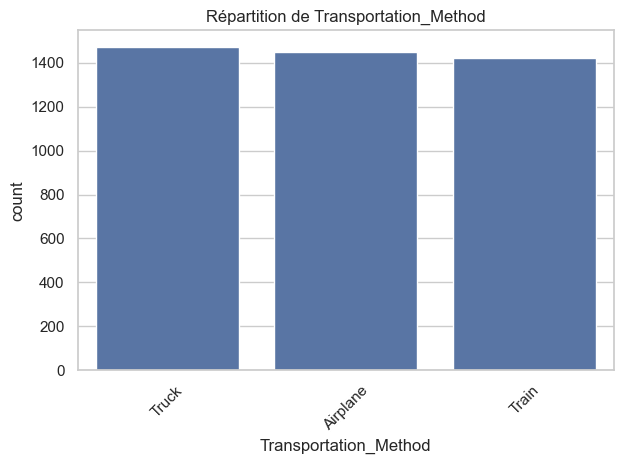

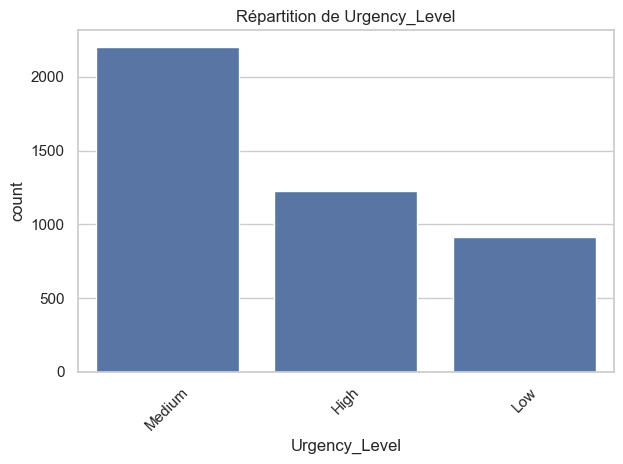

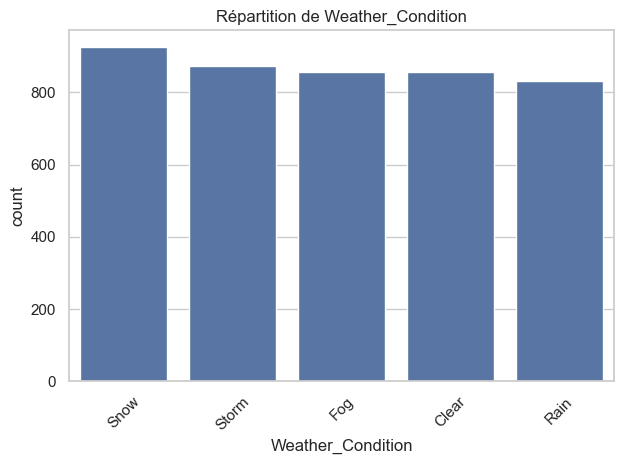

In [12]:
for col in cat_col: 
    sns.countplot(data=chain, x=col, order=chain[col].value_counts().index)
    plt.title(f"Répartition de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Analyse bivariée

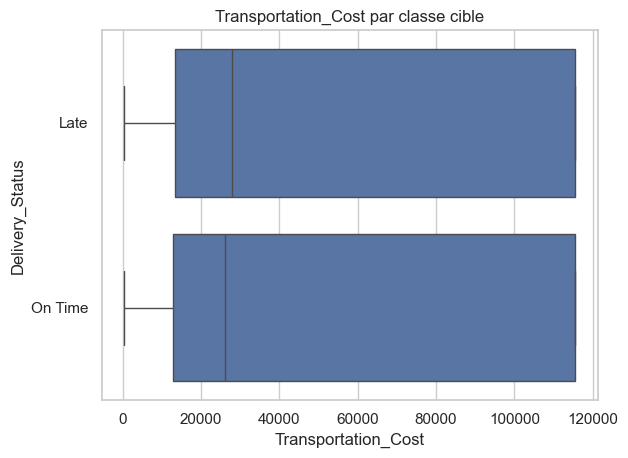

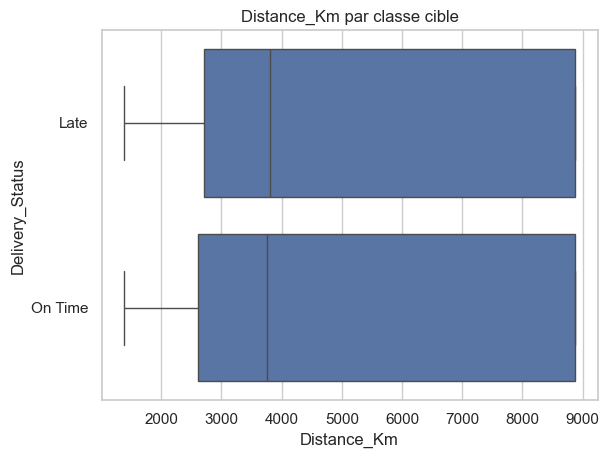

In [13]:
for col in num_col: 
    sns.boxplot(data=chain, x=col, y=target)
    plt.title(f"{col} par classe cible")
    plt.show()

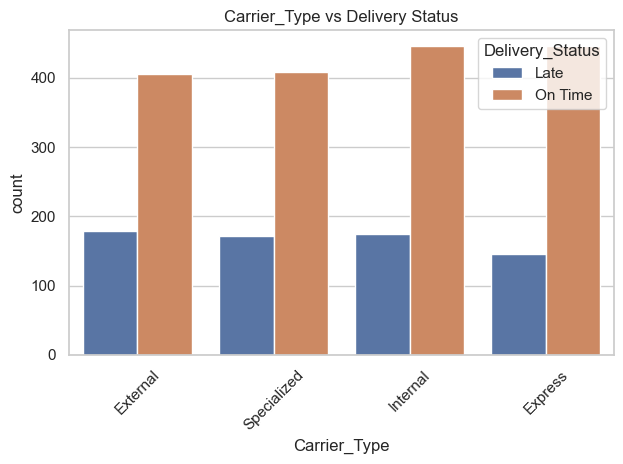

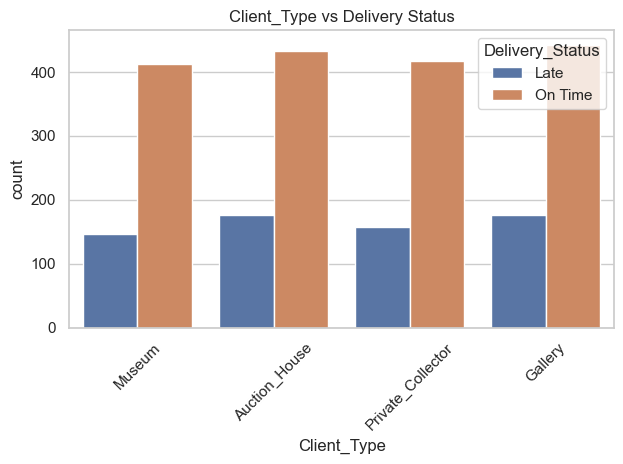

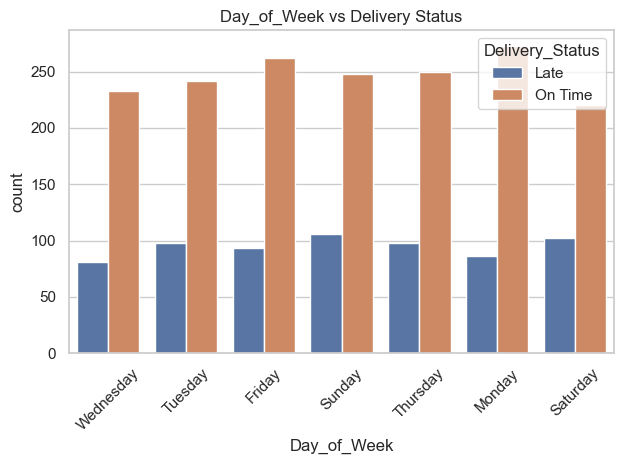

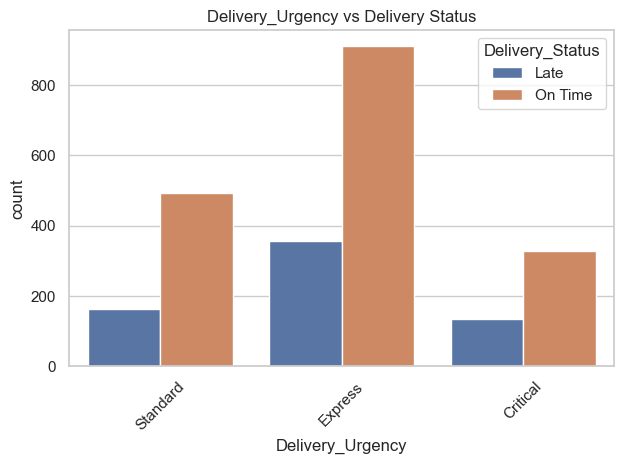

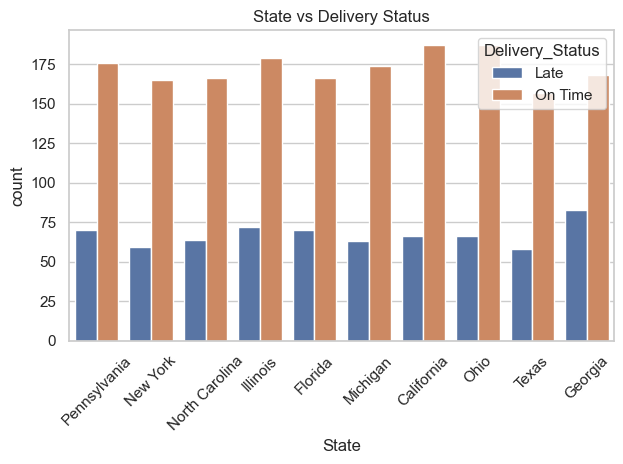

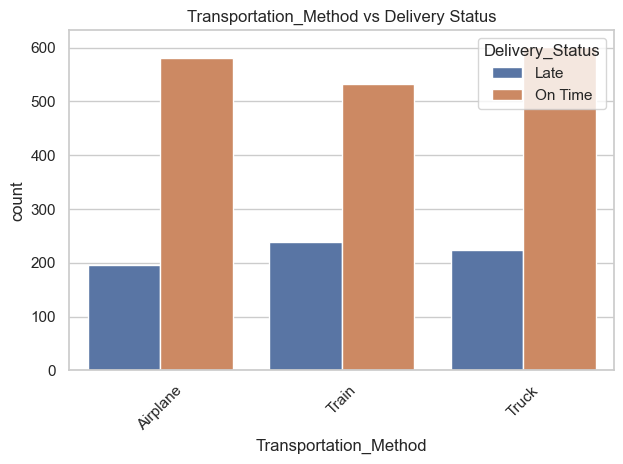

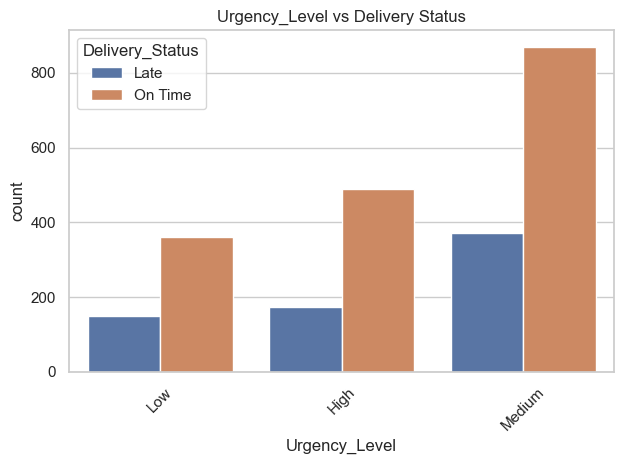

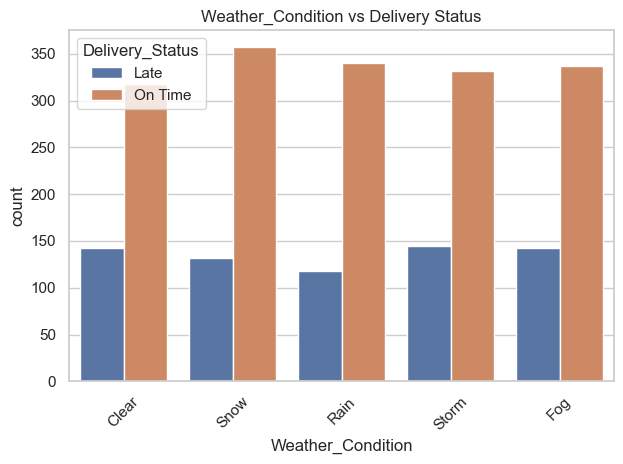

In [14]:
for col in cat_col:
    sns.countplot(chain, x=col, hue=target)
    plt.title(f"{col} vs Delivery Status")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

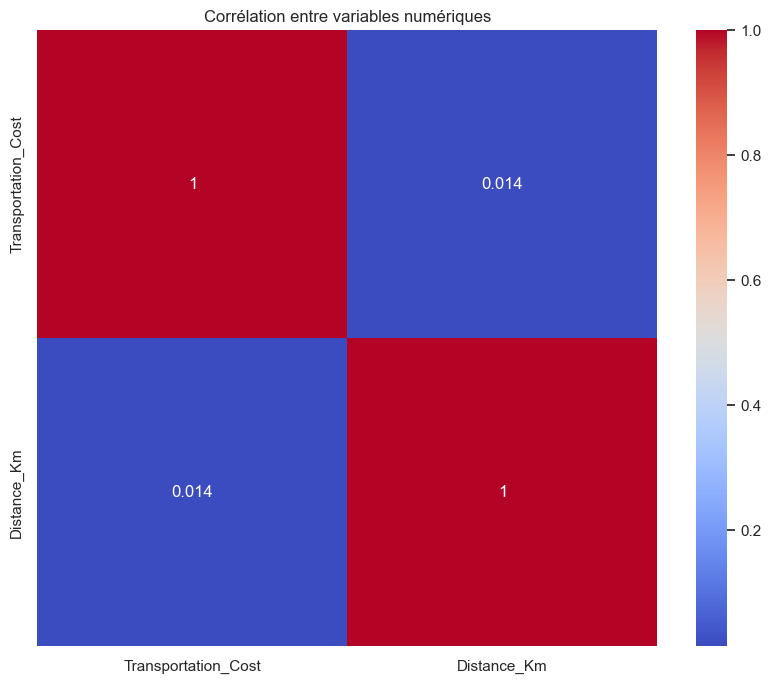

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(chain[num_col].corr(),annot=True, cmap="coolwarm")
plt.title("Corrélation entre variables numériques")
plt.show()

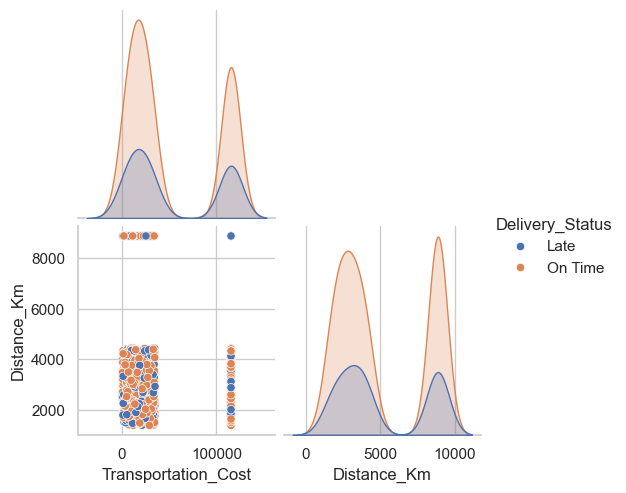

In [16]:
sns.pairplot(chain, hue="Delivery_Status", diag_kind='kde', corner=True)
plt.show()